
#VaR Workshop: Historical Simulation (HS) and Weighted Historical Simulation (WHS)
###**Financial Models**
### Diego Alonso Garcia
### Professor Aurelio Vasquez




# **Question 1**

 Assume you are long 1USD of the S&P 500 index on each day. Calculate the 1-day, 1% VaRs
 on each day in October 1987 using Historical Simulation. Use a 250-day moving window.
 Plot the VaR and the losses.

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the CSV data
file_path = '/content/Workshop2_Python_Ex1_2.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Step 2: Calculate daily log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Step 3: Calculate losses as negative of log returns
df['Losses'] = -df['Log_Returns']

# Step 4: Calculate VaR for October 1987
# Create a column for VaR
df['VaR'] = np.nan

# Define the date range for October 1987
october_1987 = (df['Date'] >= '1987-10-01') & (df['Date'] <= '1987-10-31')

# Loop over each day in October 1987 to calculate VaR
for i in df[october_1987].index:
    # Get the previous 250 log returns
    previous_returns = df['Log_Returns'].iloc[:i].dropna().tail(250)
    if len(previous_returns) > 0:
        # Calculate the 1% percentile
        var_value = np.percentile(previous_returns, 1)
        # Store in the VaR column
        df.at[i, 'VaR'] = var_value * -1

# Display the first few rows of the dataframe to verify
print(df)

          Date   Close  Log_Returns    Losses       VaR
0   1986-10-03  233.71          NaN       NaN       NaN
1   1986-10-06  234.78     0.004568 -0.004568       NaN
2   1986-10-07  234.41    -0.001577  0.001577       NaN
3   1986-10-08  236.68     0.009637 -0.009637       NaN
4   1986-10-09  235.85    -0.003513  0.003513       NaN
..         ...     ...          ...       ...       ...
268 1987-10-26  227.67    -0.086418  0.086418  0.035089
269 1987-10-27  233.19     0.023956 -0.023956  0.046615
270 1987-10-28  233.28     0.000386 -0.000386  0.046615
271 1987-10-29  244.77     0.048080 -0.048080  0.046615
272 1987-10-30  251.79     0.028276 -0.028276  0.046615

[273 rows x 5 columns]


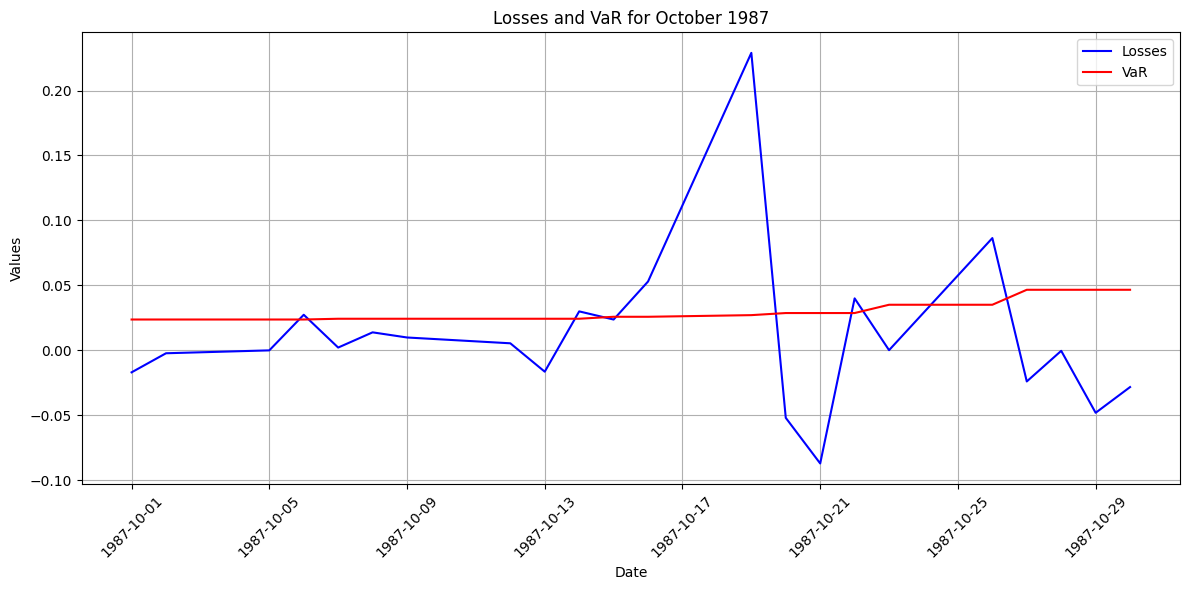

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for October 1987 and drop NaN values in 'Losses' and 'VaR'
october_data = df[(df['Date'] >= '1987-10-01') & (df['Date'] <= '1987-10-31')]
october_data = october_data[['Date', 'Losses', 'VaR']].dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(october_data['Date'], october_data['Losses'], label='Losses', color='blue')
plt.plot(october_data['Date'], october_data['VaR'], label='VaR', color='red')

# Formatting the plot
plt.title('Losses and VaR for October 1987')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()



b) Repeat the exercise assuming you are short 1USD each day. Plot the
 VaR and the losses again. Compare with Figures 2.2 and 2.3.

In [ ]:
# Step 1: Add the "VaR short" column
df['VaR_short'] = np.nan

# Loop over each day in October 1987 to calculate VaR short
for i in df[october_1987].index:
    # Get the previous 250 losses
    previous_losses = df['Losses'].iloc[:i].dropna().tail(250)
    if len(previous_losses) > 0:
        # Calculate the 1% percentile
        var_short_value = np.percentile(previous_losses, 1)
        # Store in the VaR_short column
        df.at[i, 'VaR_short'] = var_short_value * -1

# Print the DataFrame with relevant columns
print(df[['Date', 'Losses', 'VaR', 'VaR_short']].dropna())

          Date    Losses       VaR  VaR_short
251 1987-10-01 -0.016945  0.023725   0.023575
252 1987-10-02 -0.002258  0.023725   0.023575
253 1987-10-05 -0.000030  0.023725   0.023575
254 1987-10-06  0.027377  0.023725   0.023575
255 1987-10-07  0.002132  0.024310   0.023575
256 1987-10-08  0.013846  0.024310   0.023575
257 1987-10-09  0.009884  0.024310   0.023575
258 1987-10-12  0.005415  0.024310   0.023575
259 1987-10-13 -0.016445  0.024310   0.023575
260 1987-10-14  0.029982  0.024310   0.023575
261 1987-10-15  0.023704  0.025832   0.023575
262 1987-10-16  0.052976  0.025832   0.023575
263 1987-10-19  0.228997  0.027091   0.023575
264 1987-10-20 -0.051954  0.028706   0.023575
265 1987-10-21 -0.087089  0.028706   0.024221
266 1987-10-22  0.039995  0.028706   0.026430
267 1987-10-23  0.000121  0.035089   0.026430
268 1987-10-26  0.086418  0.035089   0.026430
269 1987-10-27 -0.023956  0.046615   0.026430
270 1987-10-28 -0.000386  0.046615   0.026430
271 1987-10-29 -0.048080  0.046615

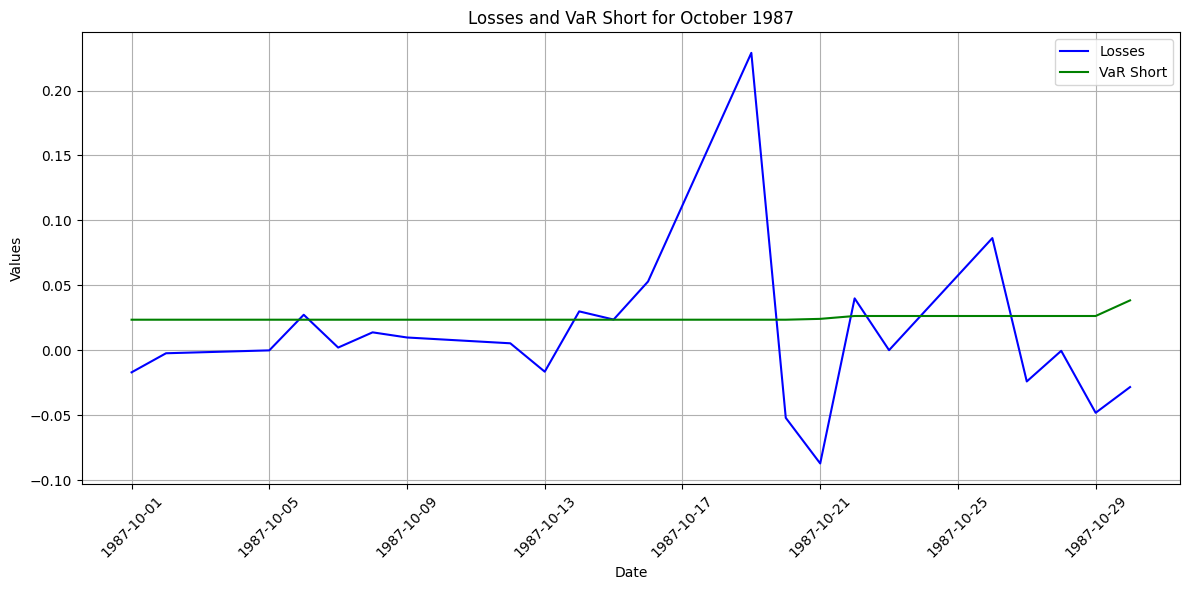

In [ ]:
# Filter the DataFrame for October 1987 and drop NaN values in 'Losses' and 'VaR_short'
october_data_short = df[(df['Date'] >= '1987-10-01') & (df['Date'] <= '1987-10-31')]
october_data_short = october_data_short[['Date', 'Losses', 'VaR_short']].dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(october_data_short['Date'], october_data_short['Losses'], label='Losses', color='blue')
plt.plot(october_data_short['Date'], october_data_short['VaR_short'], label='VaR Short', color='green')

# Formatting the plot
plt.title('Losses and VaR Short for October 1987')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


# **Question 2**

 Assume youare long USD 1 of the S&P500index on each day. Calculate the 1-day, 1% VaRs on
 each day in October 1987 using Weighted Historical Simulation. You can ignore the linear
 interpolation part of WHS. Use a weighting parameter of
0.99 in WHS. Use a 250-day
 moving window.  Repeat the exercise assuming you are short 1 USD
 each day. Plot the VaR and the losses again. Compare with Figures 2.2 and 2.3.

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Calculate for the last day of October 1987
target_date = pd.to_datetime('1987-10-30')
previous_returns = df[df['Date'] < target_date]['Log_Returns'].dropna().tail(250)

# Create a temporary DataFrame
temp_df = pd.DataFrame(previous_returns).reset_index(drop=True)
temp_df.columns = ['Log_Returns']

# Print the temporary DataFrame
print("Temporary DataFrame with the last 250 Log Returns:")
print(temp_df)

Temporary DataFrame with the last 250 Log Returns:
     Log_Returns
0       0.001626
1       0.001542
2      -0.002884
3      -0.000407
4       0.001464
..           ...
245    -0.000121
246    -0.086418
247     0.023956
248     0.000386
249     0.048080

[250 rows x 1 columns]


In [ ]:
# Step 2: Calculate weights η_t
eta = 0.99
m = 250  # number of observations for weighting

# Calculate weights with t in descending order (t goes from 250 to 1)
weights = [(eta**(m - t)) * (1 - eta) / (1 - eta**m) for t in range(1, len(temp_df) + 1)]
temp_df['Weights'] = weights

# Print the DataFrame with weights
print("\nTemporary DataFrame with Weights:")
print(temp_df)



Temporary DataFrame with Weights:
     Log_Returns   Weights
0       0.001626  0.000891
1       0.001542  0.000900
2      -0.002884  0.000909
3      -0.000407  0.000918
4       0.001464  0.000928
..           ...       ...
245    -0.000121  0.010453
246    -0.086418  0.010559
247     0.023956  0.010666
248     0.000386  0.010773
249     0.048080  0.010882

[250 rows x 2 columns]


In [ ]:
# Step 3: Sort the DataFrame by log returns in ascending order
temp_df.sort_values('Log_Returns', inplace=True)

# Print the sorted DataFrame
print("\nSorted Temporary DataFrame by Log Returns:")
print(temp_df)



Sorted Temporary DataFrame by Log Returns:
     Log_Returns   Weights
241    -0.228997  0.010041
246    -0.086418  0.010559
240    -0.052976  0.009941
244    -0.039995  0.010349
238    -0.029982  0.009743
..           ...       ...
139     0.024333  0.003602
222     0.028445  0.008296
249     0.048080  0.010882
242     0.051954  0.010143
243     0.087089  0.010245

[250 rows x 2 columns]


In [ ]:
# Step 4: Calculate cumulative weights
temp_df['Cumulative_Weights'] = temp_df['Weights'].cumsum()

# Print the DataFrame with cumulative weights
print("\nTemporary DataFrame with Cumulative Weights:")
print(temp_df)


Temporary DataFrame with Cumulative Weights:
     Log_Returns   Weights  Cumulative_Weights
241    -0.228997  0.010041            0.010041
246    -0.086418  0.010559            0.020600
240    -0.052976  0.009941            0.030541
244    -0.039995  0.010349            0.040890
238    -0.029982  0.009743            0.050633
..           ...       ...                 ...
139     0.024333  0.003602            0.960434
222     0.028445  0.008296            0.968730
249     0.048080  0.010882            0.979612
242     0.051954  0.010143            0.989755
243     0.087089  0.010245            1.000000

[250 rows x 3 columns]


In [ ]:
# Step 5: Calculate WHS VaR
whs_var = temp_df[temp_df['Cumulative_Weights'] <= 0.01]

if not whs_var.empty:
    whs_var_value = whs_var['Log_Returns'].iloc[-1] * -1  # Take the last return that meets the condition and negate it
    print(f"\nWHS VaR for {target_date.date()}: {whs_var_value}")
else:
    # If no return meets the condition, use the first return
    whs_var_value = temp_df['Log_Returns'].iloc[0] * -1
    print(f"\nNo valid WHS VaR found for {target_date.date()}. Using the first return: {whs_var_value}")



No valid WHS VaR found for 1987-10-30. Using the first return: 0.22899722656567034


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Add a new column for VaR WHS
df['VaR_WHS'] = np.nan

# Parameters
eta = 0.99
m = 250  # number of observations for weighting
october_dates = df[(df['Date'] >= '1987-10-01') & (df['Date'] <= '1987-10-31')].index

# Step 2: Calculate WHS VaR for each day in October 1987
for i in october_dates:
    # Create a DataFrame with the last 250 log returns
    previous_returns = df['Log_Returns'].iloc[:i].dropna().tail(250)

    # If there are not enough returns, skip this iteration
    if len(previous_returns) < 250:
        continue

    temp_df = pd.DataFrame(previous_returns).reset_index(drop=True)
    temp_df.columns = ['Log_Returns']

    # Step 3: Calculate weights η_t
    weights = [(eta**(250 - t)) * (1 - eta) / (1 - eta**m) for t in range(250)]
    temp_df['Weights'] = weights

    # Step 4: Sort by log returns in ascending order
    temp_df.sort_values('Log_Returns', inplace=True)

    # Step 5: Calculate cumulative weights
    temp_df['Cumulative_Weights'] = temp_df['Weights'].cumsum()

    # Step 6: Calculate WHS VaR
    whs_var = temp_df[temp_df['Cumulative_Weights'] <= 0.01]

    if not whs_var.empty:
        whs_var_value = whs_var['Log_Returns'].iloc[-1] * -1  # Take the last return and negate it
        df.at[i, 'VaR_WHS'] = whs_var_value
    else:
        # If no valid return is found, use the first return
        df.at[i, 'VaR_WHS'] = temp_df['Log_Returns'].iloc[0] * -1

# Print the DataFrame to check the results
print(df[['Date', 'Log_Returns', 'VaR_WHS']].dropna())


          Date  Log_Returns   VaR_WHS
251 1987-10-01     0.016945  0.023768
252 1987-10-02     0.002258  0.023768
253 1987-10-05     0.000030  0.023768
254 1987-10-06    -0.027377  0.023768
255 1987-10-07    -0.002132  0.027377
256 1987-10-08    -0.013846  0.027377
257 1987-10-09    -0.009884  0.027377
258 1987-10-12    -0.005415  0.027377
259 1987-10-13     0.016445  0.027377
260 1987-10-14    -0.029982  0.027377
261 1987-10-15    -0.023704  0.029982
262 1987-10-16    -0.052976  0.029982
263 1987-10-19    -0.228997  0.052976
264 1987-10-20     0.051954  0.228997
265 1987-10-21     0.087089  0.228997
266 1987-10-22    -0.039995  0.228997
267 1987-10-23    -0.000121  0.228997
268 1987-10-26    -0.086418  0.228997
269 1987-10-27     0.023956  0.228997
270 1987-10-28     0.000386  0.228997
271 1987-10-29     0.048080  0.228997
272 1987-10-30     0.028276  0.228997


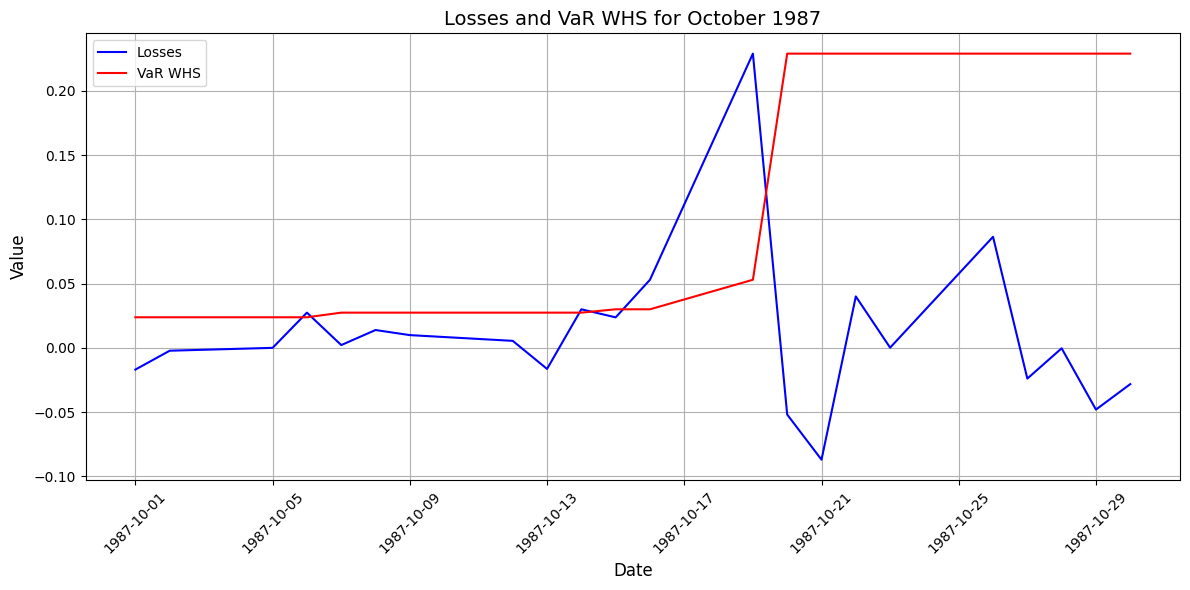

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for October 1987 with non-NaN values
october_data = df[(df['Date'] >= '1987-10-01') & (df['Date'] <= '1987-10-31')]
october_data = october_data[['Date', 'Log_Returns', 'VaR_WHS']].dropna()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting losses
plt.plot(october_data['Date'], -october_data['Log_Returns'], label='Losses', color='blue')

# Plotting VaR WHS
plt.plot(october_data['Date'], october_data['VaR_WHS'], label='VaR WHS', color='red')

# Adding titles and labels
plt.title('Losses and VaR WHS for October 1987', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Add a new column for VaR WHS Short
df['VaR_WHS_Short'] = np.nan

# Step 2: Calculate WHS VaR Short for each day in October 1987
for i in october_dates:
    # Create a DataFrame with the last 250 losses
    previous_losses = -df['Log_Returns'].iloc[:i].dropna().tail(250)  # Take negative of log returns as losses

    # If there are not enough losses, skip this iteration
    if len(previous_losses) < 250:
        continue

    temp_df = pd.DataFrame(previous_losses).reset_index(drop=True)
    temp_df.columns = ['Losses']

    # Step 3: Calculate weights η_t
    weights = [(eta**(250 - t)) * (1 - eta) / (1 - eta**m) for t in range(250)]
    temp_df['Weights'] = weights

    # Step 4: Sort by losses in ascending order
    temp_df.sort_values('Losses', inplace=True)

    # Step 5: Calculate cumulative weights
    temp_df['Cumulative_Weights'] = temp_df['Weights'].cumsum()

    # Step 6: Calculate WHS VaR Short
    whs_var_short = temp_df[temp_df['Cumulative_Weights'] <= 0.01]

    if not whs_var_short.empty:
        whs_var_short_value = whs_var_short['Losses'].iloc[-1] * -1  # Take the last loss and negate it
        df.at[i, 'VaR_WHS_Short'] = whs_var_short_value
    else:
        # If no valid loss is found, use the first loss
        df.at[i, 'VaR_WHS_Short'] = temp_df['Losses'].iloc[0] * -1

# Print the DataFrame to check the results
print(df[['Date', 'Log_Returns', 'VaR_WHS_Short']].dropna())


          Date  Log_Returns  VaR_WHS_Short
251 1987-10-01     0.016945       0.028445
252 1987-10-02     0.002258       0.028445
253 1987-10-05     0.000030       0.028445
254 1987-10-06    -0.027377       0.028445
255 1987-10-07    -0.002132       0.028445
256 1987-10-08    -0.013846       0.028445
257 1987-10-09    -0.009884       0.028445
258 1987-10-12    -0.005415       0.028445
259 1987-10-13     0.016445       0.028445
260 1987-10-14    -0.029982       0.028445
261 1987-10-15    -0.023704       0.028445
262 1987-10-16    -0.052976       0.028445
263 1987-10-19    -0.228997       0.028445
264 1987-10-20     0.051954       0.028445
265 1987-10-21     0.087089       0.051954
266 1987-10-22    -0.039995       0.087089
267 1987-10-23    -0.000121       0.087089
268 1987-10-26    -0.086418       0.087089
269 1987-10-27     0.023956       0.087089
270 1987-10-28     0.000386       0.087089
271 1987-10-29     0.048080       0.087089
272 1987-10-30     0.028276       0.087089


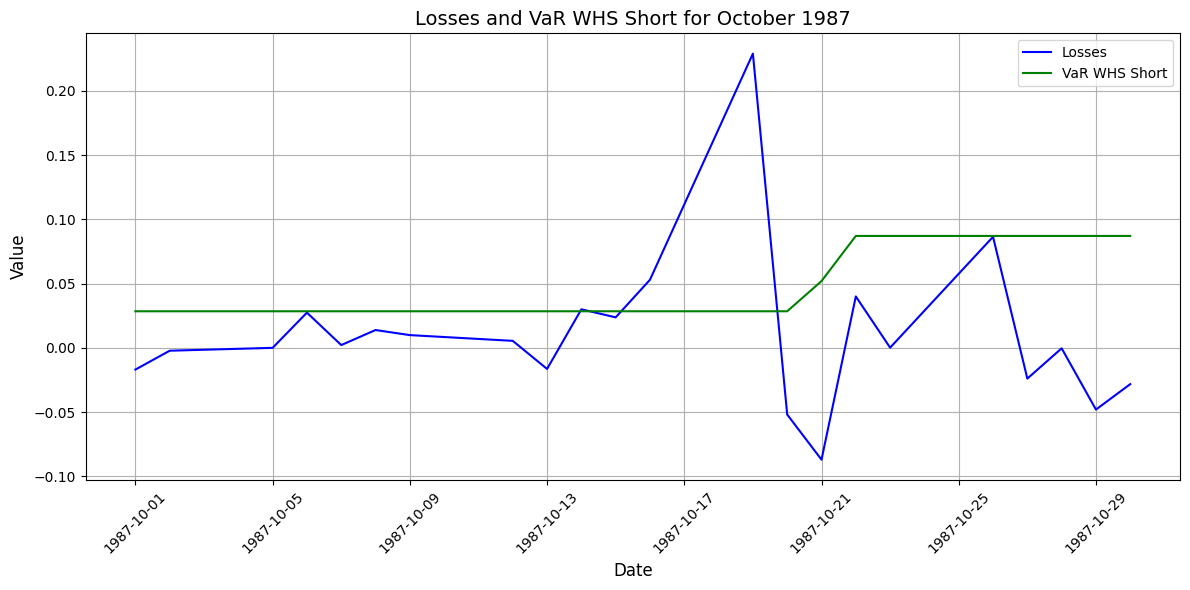

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for October 1987 with non-NaN values
october_data = df[(df['Date'] >= '1987-10-01') & (df['Date'] <= '1987-10-31')]
october_data = october_data[['Date', 'Log_Returns', 'VaR_WHS_Short']].dropna()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting losses
plt.plot(october_data['Date'], -october_data['Log_Returns'], label='Losses', color='blue')

# Plotting VaR WHS Short
plt.plot(october_data['Date'], october_data['VaR_WHS_Short'], label='VaR WHS Short', color='green')

# Adding titles and labels
plt.title('Losses and VaR WHS Short for October 1987', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


# **Question 3**

 For each day from July 1, 2008 through December 31, 2009, calculate the 10-day, 1% VaRs
 using the following methods: (a) RiskMetrics, that is, normal distribution with an exponential smoother on variance using the weight,
094; and (b) Historical Simulation. Use a
 250-day moving sample. Compute the 10-day VaRs from the 1-day VaRs by just multiplying
 by square root of 10. Plot the VaRs.

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV data
file_path = '/content/Workshop2_Python_Ex3_4.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Sort the DataFrame by date
df.sort_values('Date', inplace=True)

# Calculate daily log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Show the first few rows of the DataFrame
print(df.head())


        Date    Close  Log_Returns
0 1999-12-31  2021.40          NaN
1 2000-01-04  1925.41    -0.048651
2 2000-01-05  1929.28     0.002008
3 2000-01-06  1931.51     0.001155
4 2000-01-07  1983.83     0.026727


In [ ]:
# Initialize the new column with NaN
df['10 day VaR HS'] = np.nan

# Calculate the 10-day VaR HS for each day with sufficient data
for i in range(250, len(df)):
    # Select the previous 250 log returns
    previous_log_returns = df['Log_Returns'].iloc[i-250:i]

    # Calculate the 10-day VaR HS
    var_hs = np.percentile(previous_log_returns.dropna(), 1) * -1 * np.sqrt(10)

    # Assign the calculated VaR to the new column
    df.at[i, '10 day VaR HS'] = var_hs

# Show the updated DataFrame
print(df[['Date', 'Log_Returns', '10 day VaR HS']])


           Date  Log_Returns  10 day VaR HS
0    1999-12-31          NaN            NaN
1    2000-01-04    -0.048651            NaN
2    2000-01-05     0.002008            NaN
3    2000-01-06     0.001155            NaN
4    2000-01-07     0.026727            NaN
...         ...          ...            ...
2430 2010-03-29     0.005850       0.098893
2431 2010-03-30     0.000154       0.098893
2432 2010-03-31    -0.003263       0.098893
2433 2010-04-01     0.007424       0.098893
2434 2010-04-05     0.007929       0.098893

[2435 rows x 3 columns]


In [ ]:
# Define lambda (λ)
lambda_value = 0.94

# Initialize the 'RM' column with NaN
df['RM'] = np.nan

# Calculate the sample variance of the log returns for the second observation
initial_variance = df['Log_Returns'].var()
df.at[1, 'RM'] = initial_variance  # Set the second observation's RM value

# Calculate the following RM values based on the recursive formula
for t in range(2, len(df)):
    if not pd.isna(df.at[t-1, 'Log_Returns']) and not pd.isna(df.at[t-1, 'RM']):
        previous_variance = df.at[t-1, 'RM']
        previous_log_return = df.at[t-1, 'Log_Returns']
        rm_t = (lambda_value * previous_variance) + (1 - lambda_value) * (previous_log_return ** 2)
        df.at[t, 'RM'] = rm_t

# Print the updated DataFrame with the 'RM' column
print(df[['Date', 'Log_Returns', 'RM']].head(15))



         Date  Log_Returns        RM
0  1999-12-31          NaN       NaN
1  2000-01-04    -0.048651  0.000202
2  2000-01-05     0.002008  0.000332
3  2000-01-06     0.001155  0.000312
4  2000-01-07     0.026727  0.000294
5  2000-01-11    -0.001973  0.000319
6  2000-01-12    -0.004333  0.000300
7  2000-01-13     0.012096  0.000283
8  2000-01-14     0.010613  0.000275
9  2000-01-18    -0.006847  0.000265
10 2000-01-19     0.000569  0.000252
11 2000-01-20    -0.007116  0.000237
12 2000-01-21    -0.002919  0.000226
13 2000-01-24    -0.028015  0.000213
14 2000-01-25     0.006046  0.000247


In [ ]:
from scipy.stats import norm

# Calculate the inverse of the standard normal distribution at the 0.01 percentile
z_value = norm.ppf(0.01)

# Initialize the '10 - Day VaR RiskM' column with NaN
df['10 - Day VaR RiskM'] = np.nan

# Calculate the '10 - Day VaR RiskM' for each row where RM is not NaN
for i in range(len(df)):
    if not pd.isna(df.at[i, 'RM']) and df.at[i, 'RM'] > 0:
        df.at[i, '10 - Day VaR RiskM'] = (-1) * np.sqrt(10) * z_value * np.sqrt(df.at[i, 'RM'])

# Print the updated DataFrame with the new column
print(df[['Date', 'Log_Returns', 'RM', '10 - Day VaR RiskM']].head(15))


         Date  Log_Returns        RM  10 - Day VaR RiskM
0  1999-12-31          NaN       NaN                 NaN
1  2000-01-04    -0.048651  0.000202            0.104588
2  2000-01-05     0.002008  0.000332            0.134045
3  2000-01-06     0.001155  0.000312            0.130012
4  2000-01-07     0.026727  0.000294            0.126069
5  2000-01-11    -0.001973  0.000319            0.131375
6  2000-01-12    -0.004333  0.000300            0.127422
7  2000-01-13     0.012096  0.000283            0.123787
8  2000-01-14     0.010613  0.000275            0.121979
9  2000-01-18    -0.006847  0.000265            0.119799
10 2000-01-19     0.000569  0.000252            0.116803
11 2000-01-20    -0.007116  0.000237            0.113250
12 2000-01-21    -0.002919  0.000226            0.110546
13 2000-01-24    -0.028015  0.000213            0.107307
14 2000-01-25     0.006046  0.000247            0.115639


In [ ]:
# Filter the DataFrame for the specified date range
filtered_df = df[(df['Date'] >= '2008-07-01') & (df['Date'] <= '2009-12-31')]

# Print the filtered DataFrame
print(filtered_df[['Date', 'Log_Returns', '10 day VaR HS', '10 - Day VaR RiskM']])


           Date  Log_Returns  10 day VaR HS  10 - Day VaR RiskM
2020 2008-07-01     0.004023       0.096751            0.088036
2021 2008-07-02    -0.018317       0.096751            0.085661
2022 2008-07-03     0.001113       0.096751            0.089370
2023 2008-07-07    -0.008405       0.096751            0.086671
2024 2008-07-08     0.017323       0.096751            0.085384
...         ...          ...            ...                 ...
2370 2009-12-22     0.003580       0.155146            0.067822
2371 2009-12-24     0.007753       0.148933            0.066071
2372 2009-12-28     0.001287       0.148933            0.065564
2373 2009-12-29    -0.001228       0.148933            0.063609
2374 2009-12-30     0.000286       0.148933            0.061711

[355 rows x 4 columns]


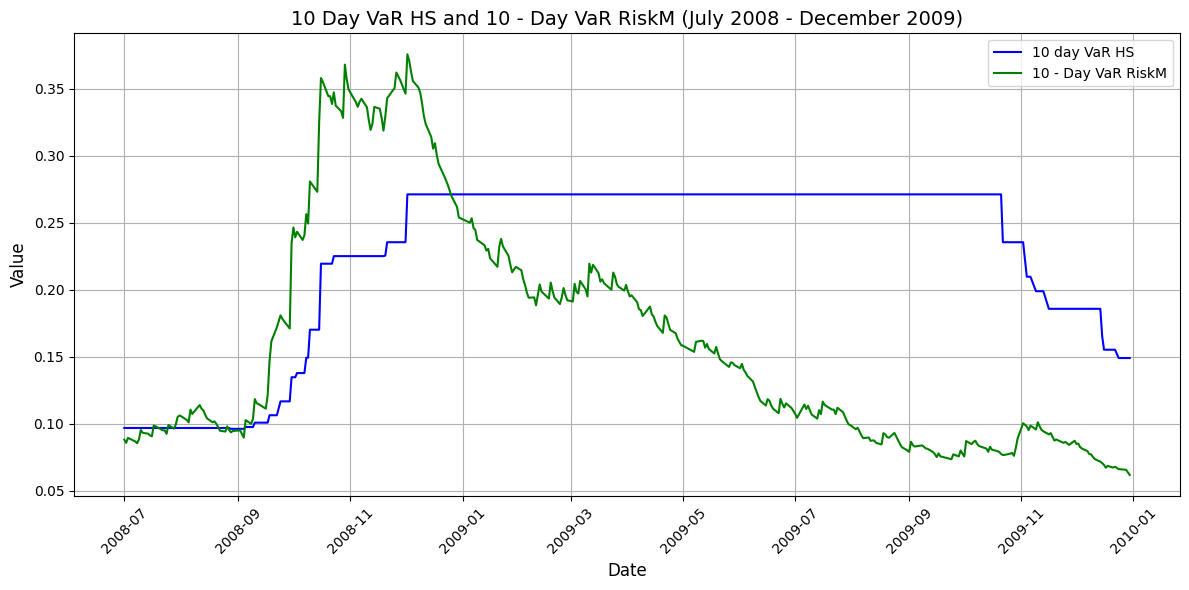

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for plotting
plot_data = filtered_df[['Date', '10 day VaR HS', '10 - Day VaR RiskM']].dropna()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the "10 day VaR HS" column
plt.plot(plot_data['Date'], plot_data['10 day VaR HS'], label='10 day VaR HS', color='blue')

# Plotting the "10 - Day VaR RiskM" column
plt.plot(plot_data['Date'], plot_data['10 - Day VaR RiskM'], label='10 - Day VaR RiskM', color='green')

# Adding titles and labels
plt.title('10 Day VaR HS and 10 - Day VaR RiskM (July 2008 - December 2009)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


# **Question 4**

Plot the Cumulative P/L of Historical Simultation and Risk Metrics methods



In [ ]:
# Create a DataFrame with enough information, starting one day before the specified dates
full_filtered_df = df[(df['Date'] >= '2008-06-30') & (df['Date'] <= '2009-12-31')].copy()

# Set the Date column as the index for easier calculations
full_filtered_df.set_index('Date', inplace=True)


In [ ]:
# Add 'Position RM' column
full_filtered_df['Position RM'] = 100000 / full_filtered_df['10 - Day VaR RiskM']

# Add 'Position HS' column
full_filtered_df['Position HS'] = 100000 / full_filtered_df['10 day VaR HS']

# Calculate P/L for RM and HS using shifted Close prices
full_filtered_df['P/L RM'] = full_filtered_df['Position RM'] * ((full_filtered_df['Close'] / full_filtered_df['Close'].shift(1)) - 1)
full_filtered_df['P/L HS'] = full_filtered_df['Position HS'] * ((full_filtered_df['Close'] / full_filtered_df['Close'].shift(1)) - 1)

# Add cumulative P/L columns
full_filtered_df['Cumulative P/L RM'] = full_filtered_df['P/L RM'].cumsum()
full_filtered_df['Cumulative P/L HS'] = full_filtered_df['P/L HS'].cumsum()

# Filter to keep only the relevant date range for display
final_df = full_filtered_df[(full_filtered_df.index >= '2008-07-01') & (full_filtered_df.index <= '2009-12-31')]

# Print the resulting DataFrame with the new columns
print(final_df[['Close', '10 - Day VaR RiskM', '10 day VaR HS', 'Position RM', 'Position HS', 'P/L RM', 'P/L HS', 'Cumulative P/L RM', 'Cumulative P/L HS']].head(15))


              Close  10 - Day VaR RiskM  10 day VaR HS   Position RM  \
Date                                                                   
2008-07-01  2039.66            0.088036       0.096751  1.135899e+06   
2008-07-02  2002.64            0.085661       0.096751  1.167387e+06   
2008-07-03  2004.87            0.089370       0.096751  1.118941e+06   
2008-07-07  1988.09            0.086671       0.096751  1.153790e+06   
2008-07-08  2022.83            0.085384       0.096751  1.171173e+06   
2008-07-09  1976.97            0.088473       0.096751  1.130285e+06   
2008-07-10  1990.78            0.095213       0.096751  1.050279e+06   
2008-07-11  1968.86            0.093161       0.096751  1.073415e+06   
2008-07-14  1951.08            0.092500       0.096751  1.081083e+06   
2008-07-15  1929.85            0.091160       0.096751  1.096978e+06   
2008-07-16  1978.47            0.090555       0.096751  1.104305e+06   
2008-07-17  2002.30            0.098582       0.096751  1.014384

In [ ]:
# Filter the DataFrame for the specified date range
plot_df = final_df[['Cumulative P/L RM', 'Cumulative P/L HS']].dropna()


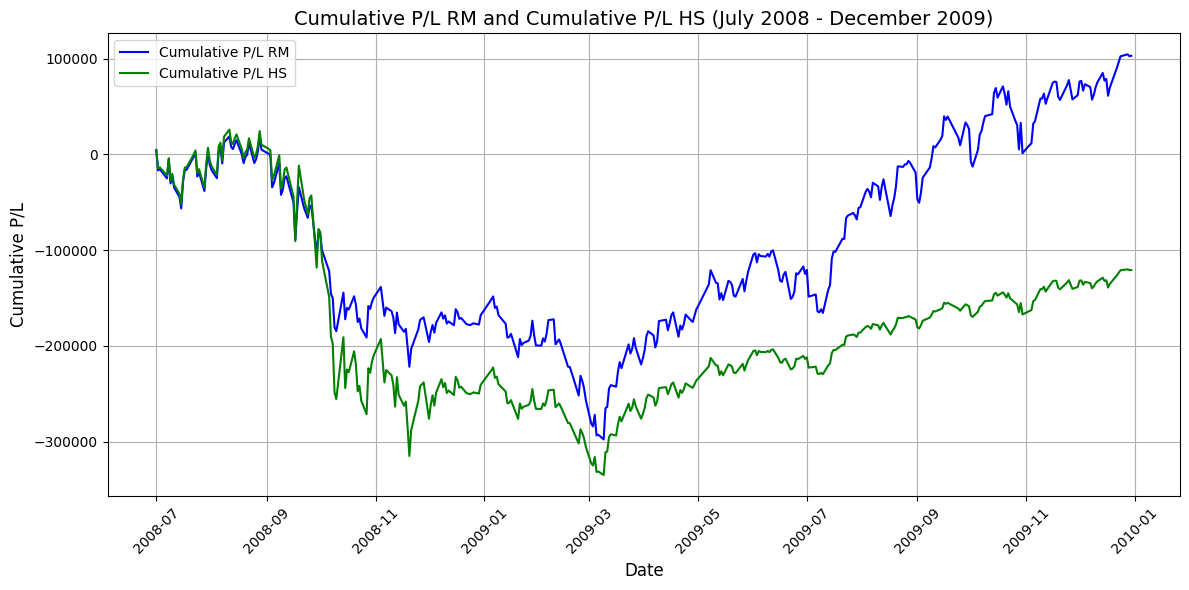

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the "Cumulative P/L RM" column
plt.plot(plot_df.index, plot_df['Cumulative P/L RM'], label='Cumulative P/L RM', color='blue')

# Plotting the "Cumulative P/L HS" column
plt.plot(plot_df.index, plot_df['Cumulative P/L HS'], label='Cumulative P/L HS', color='green')

# Adding titles and labels
plt.title('Cumulative P/L RM and Cumulative P/L HS (July 2008 - December 2009)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative P/L', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()
